In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow Version " + tf.__version__);

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data();


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

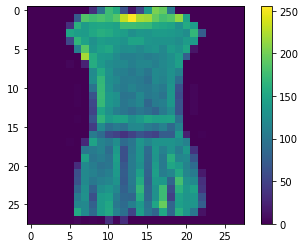

In [9]:
plt.figure();
plt.imshow(train_images[3]);
plt.colorbar();
plt.grid(False);
plt.show();


In [10]:
train_images = train_images / 255.0;
test_images = test_images / 255.0;


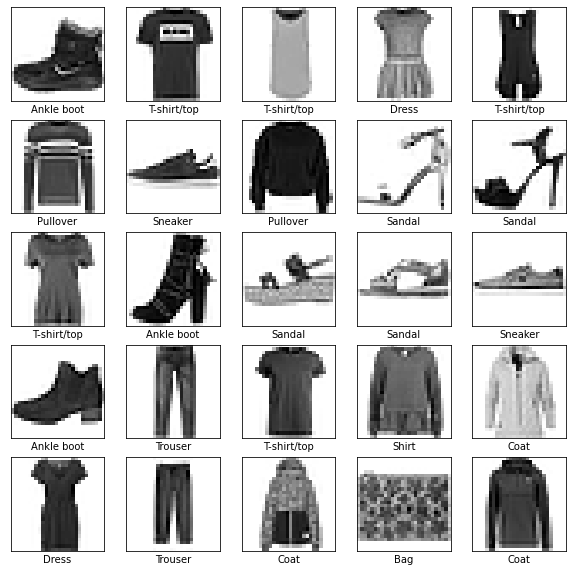

In [11]:
plt.figure(figsize=(10,10));
for i in range(25):
    plt.subplot(5,5,i+1);
    plt.xticks([]);
    plt.yticks([]);
    plt.grid(False);
    plt.imshow(train_images[i], cmap=plt.cm.binary);
    plt.xlabel(class_names[train_labels[i]]);
plt.show();    

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']);

In [14]:
# Feed the model
model.fit(train_images, train_labels, epochs=10);

Epoch 1/10
1875/1875 [==============================] - 5s 1ms/step - loss: 0.6231 - accuracy: 0.7814
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3843 - accuracy: 0.8618
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3357 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3125 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2952 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2773 - accuracy: 0.8993: 0s -
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2674 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2564 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2430 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss:

In [17]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1);
print('\nTest accuracy: ', test_acc);

313/313 [==============================] - 0s 828us/step - loss: 0.3356 - accuracy: 0.8808

Test accuracy:  0.8808000087738037


In [21]:
# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]);
predictions = probability_model.predict(test_images);

In [24]:
predictions[0];
print(predictions[0]);
predictions[0];

[5.8778380e-07 6.5964336e-09 4.2232738e-08 2.6526887e-09 3.0780919e-07
 6.1098899e-04 3.2401309e-07 4.1078702e-02 2.2453673e-06 9.5830685e-01]


In [26]:
np.argmax(predictions[0]);
test_labels[0]


9

In [27]:
# plot the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


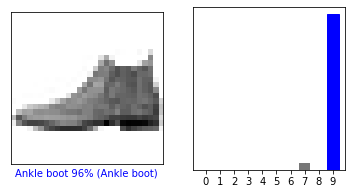

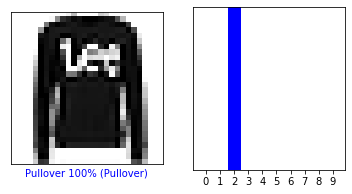

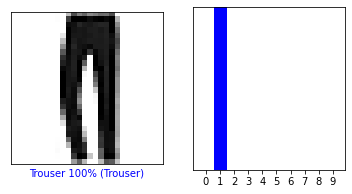

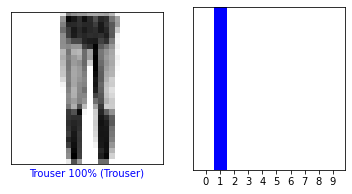

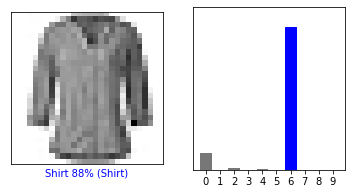

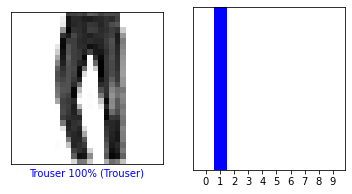

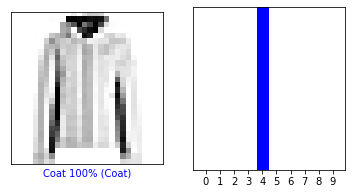

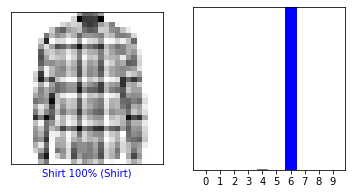

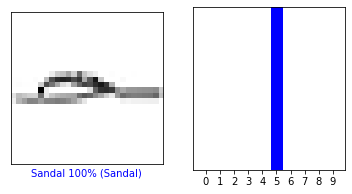

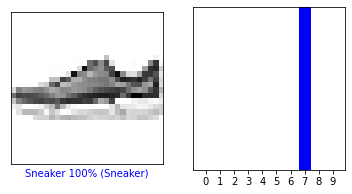

In [31]:
# Verify predictions

i = 0
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show();
    

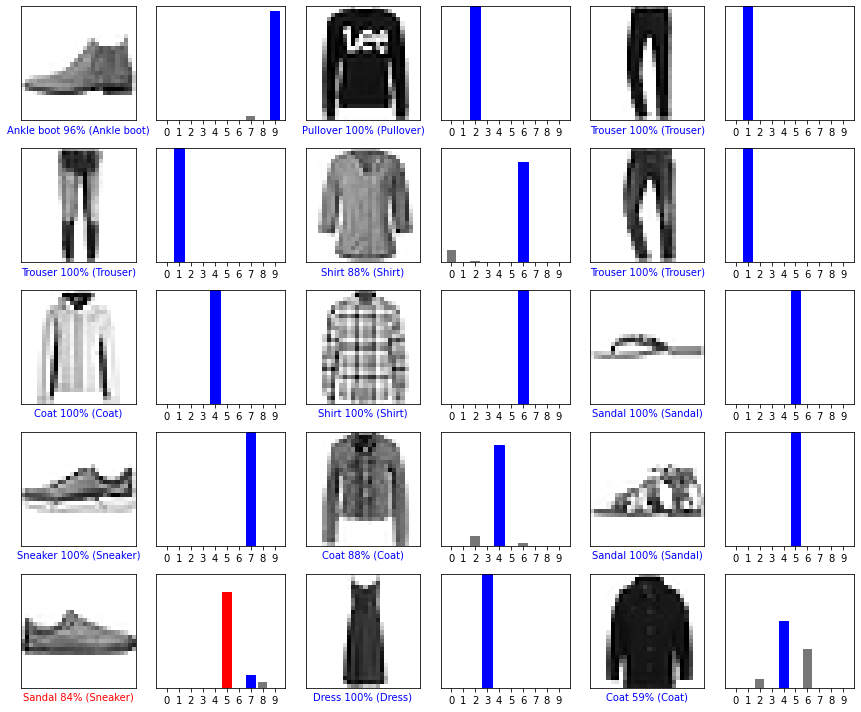

In [32]:
# Plot another example
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [33]:
# Grab an image from the test dataset
img = test_images[2];
print(img.shape);



(28, 28)
